In [27]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

In [34]:
path = 'H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/'
path_data = path + 'data/'
path_output = path + 'plots/'

In [87]:
df_temp = pd.read_csv(path_data + 'SummaryWait.csv')
df_temp = pd.read_csv(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')

In [88]:
#df_temp.info()
#df_temp.describe()
#print(df_temp.columns.tolist())
print(df_temp.columns.values)

['incRank' 'n_agents' 'n_trips' 'Potential_INEXUS_mean'
 'Potential_INEXUS_median' 'cost_BEAM_mean' 'cost_BEAM_median'
 'cost_BEAM_sum' 'distance_bike_mean' 'distance_bike_median'
 'distance_bike_sum' 'distance_mode_choice_mean'
 'distance_mode_choice_median' 'distance_mode_choice_sum'
 'distance_privateCar_mean' 'distance_privateCar_median'
 'distance_privateCar_sum' 'distance_ridehail_mean'
 'distance_ridehail_median' 'distance_ridehail_sum'
 'distance_transit_mean' 'distance_transit_median' 'distance_transit_sum'
 'distance_travelling_mean' 'distance_travelling_median'
 'distance_travelling_sum' 'distance_walking_mean'
 'distance_walking_median' 'distance_walking_sum'
 'duration_door_to_door_mean' 'duration_door_to_door_median'
 'duration_door_to_door_sum' 'duration_in_privateCar_mean'
 'duration_in_privateCar_median' 'duration_in_privateCar_sum'
 'duration_in_ridehail_mean' 'duration_in_ridehail_median'
 'duration_in_ridehail_sum' 'duration_in_transit_mean'
 'duration_in_transit_me

In [105]:
cd = df_temp[['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz','incRank', 'n_agents' ,'n_trips' ]]
cd.head()                                                                                                                                          

,lever_n_fleets,lever_position_price,lever_position_fltsz,incRank,n_agents,n_trips
0,1,1.0,1.0,0,91811,319870
1,1,1.0,1.0,1,87944,308814
2,1,1.0,1.0,2,87362,321287
3,1,1.0,1.0,3,96029,359786
4,1,1.0,1.0,4,94883,355740


In [108]:
cd = cd.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).sum()
pd.melt(cd)
#cd.describe()
cd.head(50)

incRank  n_agents  \
lever_n_fleets lever_position_price lever_position_fltsz                      
1              1.00                 1.00                      210   1919541   
2              0.27                 1.00                      210   1919265   
               0.47                 1.00                      210   1919352   
               1.00                 1.00                      210   1919601   
                                    1.64                      210   1919529   
                                    2.00                      210   1919491   
                                    4.00                      210   1919825   
                                    10.00                     210   1919899   
5              0.27                 1.00                      210   1919282   
                                    1.64                      210   1919172   
                                    2.00                      210   1919185   
                                    4.00                      210   1919403   
                                    10.00                     210   1919768   
               0.47                 1.00                      210   1919432   
                                    1.64                      210   1919439   
                                    2.00                      210   1919413   
                                    4.00                      210   1919477   
                                    10.00                     210   1919865   
               1.00                 1.00                      210   1919484   
                                    1.64                      210   1919470   
                                    2.00                      210   1919550   
                                    4.00                      210   1919592   
                                    10.00                     210   1919862   

                                                          n_trips  
lever_n_fleets lever_position_price lever_position_fltsz           
1              1.00                 1.00                  7375232  
2              0.27                 1.00                  7372472  
               0.47                 1.00                  7372243  
               1.00                 1.00                  7371640  
                                    1.64                  7376000  
                                    2.00                  7373432  
                                    4.00                  7382017  
                                    10.00                 7382990  
5              0.27                 1.00                  7370268  
                                    1.64                  7372405  
                                    2.00                  7371750  
                                    4.00                  7374572  
                                    10.00                 7385511  
               0.47                 1.00                  7369440  
                                    1.64                  7373172  
                                    2.00                  7375615  
                                    4.00                  7377907  
                                    10.00                 7385262  
               1.00                 1.00                  7373703  
                                    1.64                  7374230  
                                    2.00                  7374961  
                                    4.00                  7379999  
                                    10.00                 7382325

<AxesSubplot:xlabel='lever_position_price', ylabel='n_agents'>

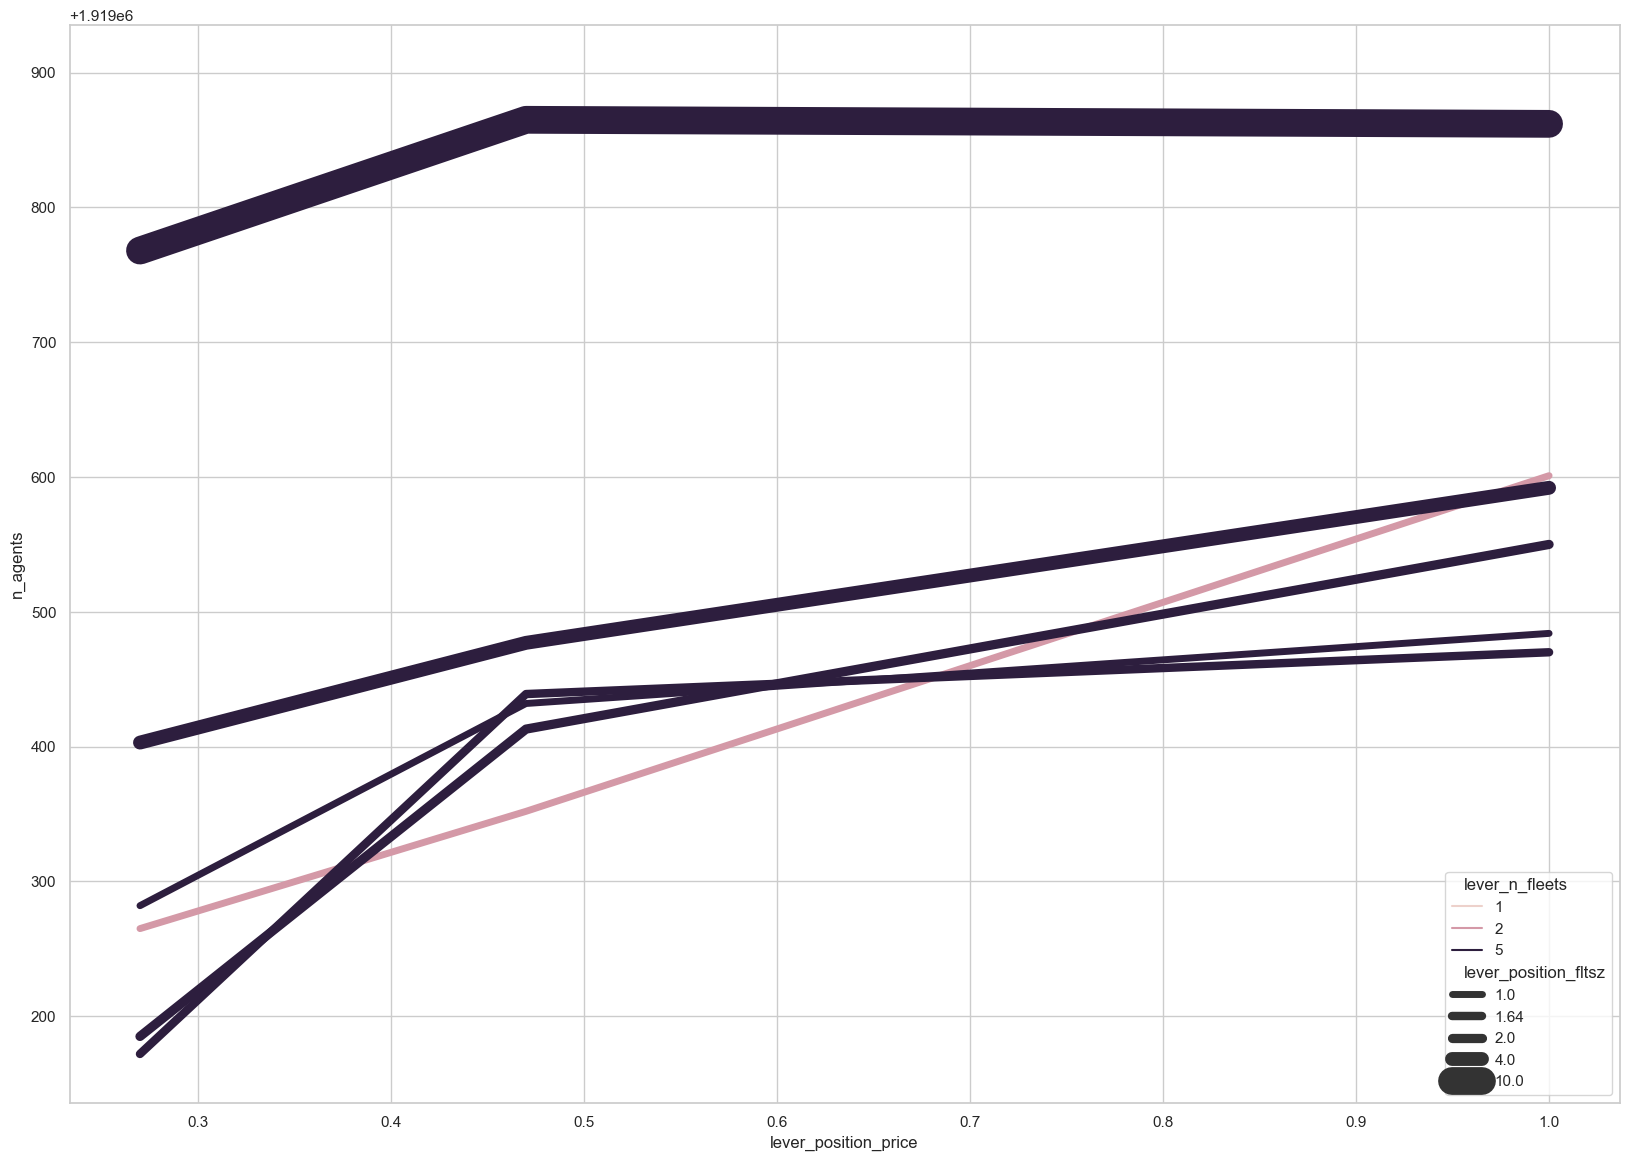

In [117]:
sns.lineplot(data=cd,
             x='lever_position_price', hue='lever_n_fleets',size ="lever_position_fltsz", sizes=(5,20),
             #style=""
             y='n_agents', 
               ci=None, linewidth = 6
             )

In [111]:
pd.melt(cd)

,variable,value
0,incRank,210
1,incRank,210
2,incRank,210
3,incRank,210
4,incRank,210
...,...,...
64,n_trips,7373703
65,n_trips,7374230
66,n_trips,7374961
67,n_trips,7379999


TypeError: Invalid object type at position 0

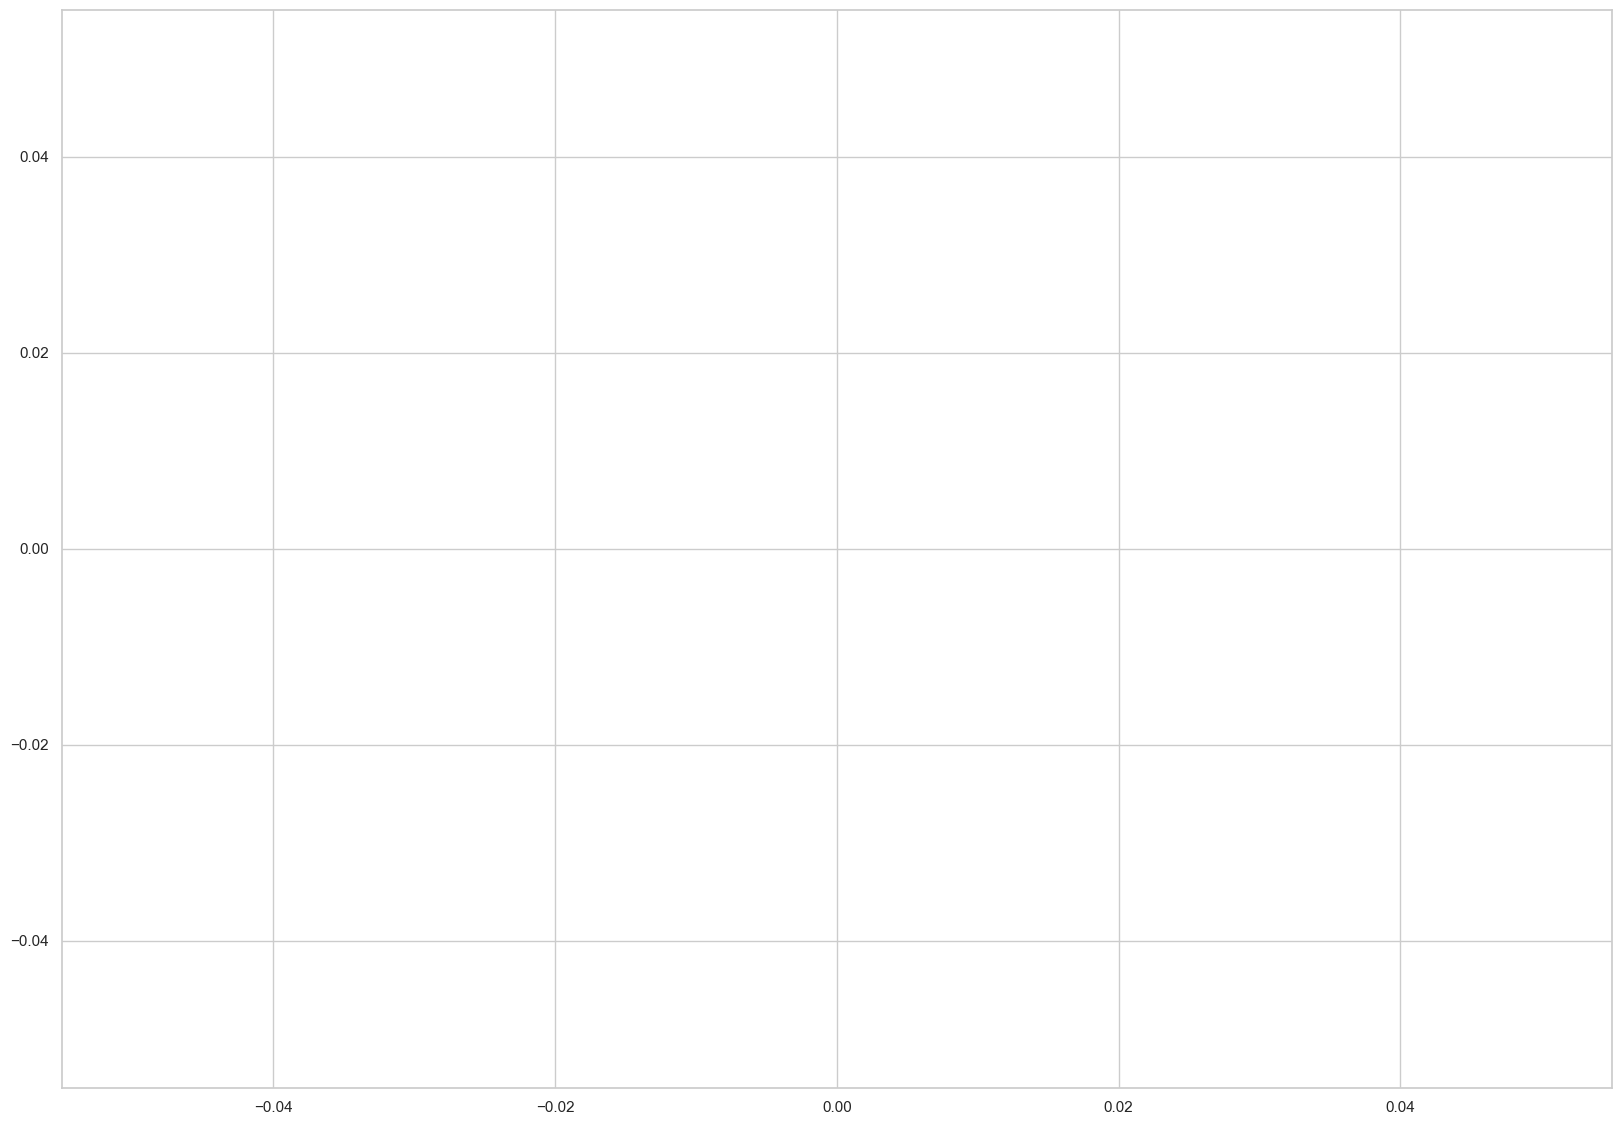

In [107]:
sns.lineplot(data=cd)

In [44]:
#temp_varName='Wait time PM - Pooled RH (median)'
#temp_varName='Trip Exec Share Ride Hail Pooled'


In [68]:
df_tmLong = df_temp[['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz', 
                     
# 'Wait time PM - Solo RH (median)',  'Wait time PM - Pooled RH (median)', 
 #'Pooling Success Rate', 'Car_Exec_Total', 'Transit_Exec_Total',
 'Trip Exec Share Bike' ,'Trip Exec Share Walk' ,'Trip Exec Share Ride Hail',
 'Trip Exec Share Ride Hail Pooled' ]]

In [ ]:
cd_plt = cd[(cd['income_deciles']=='1stD')|(cd['income_deciles']=='10thD')]

<AxesSubplot:xlabel='lever_position_fltsz', ylabel='value'>

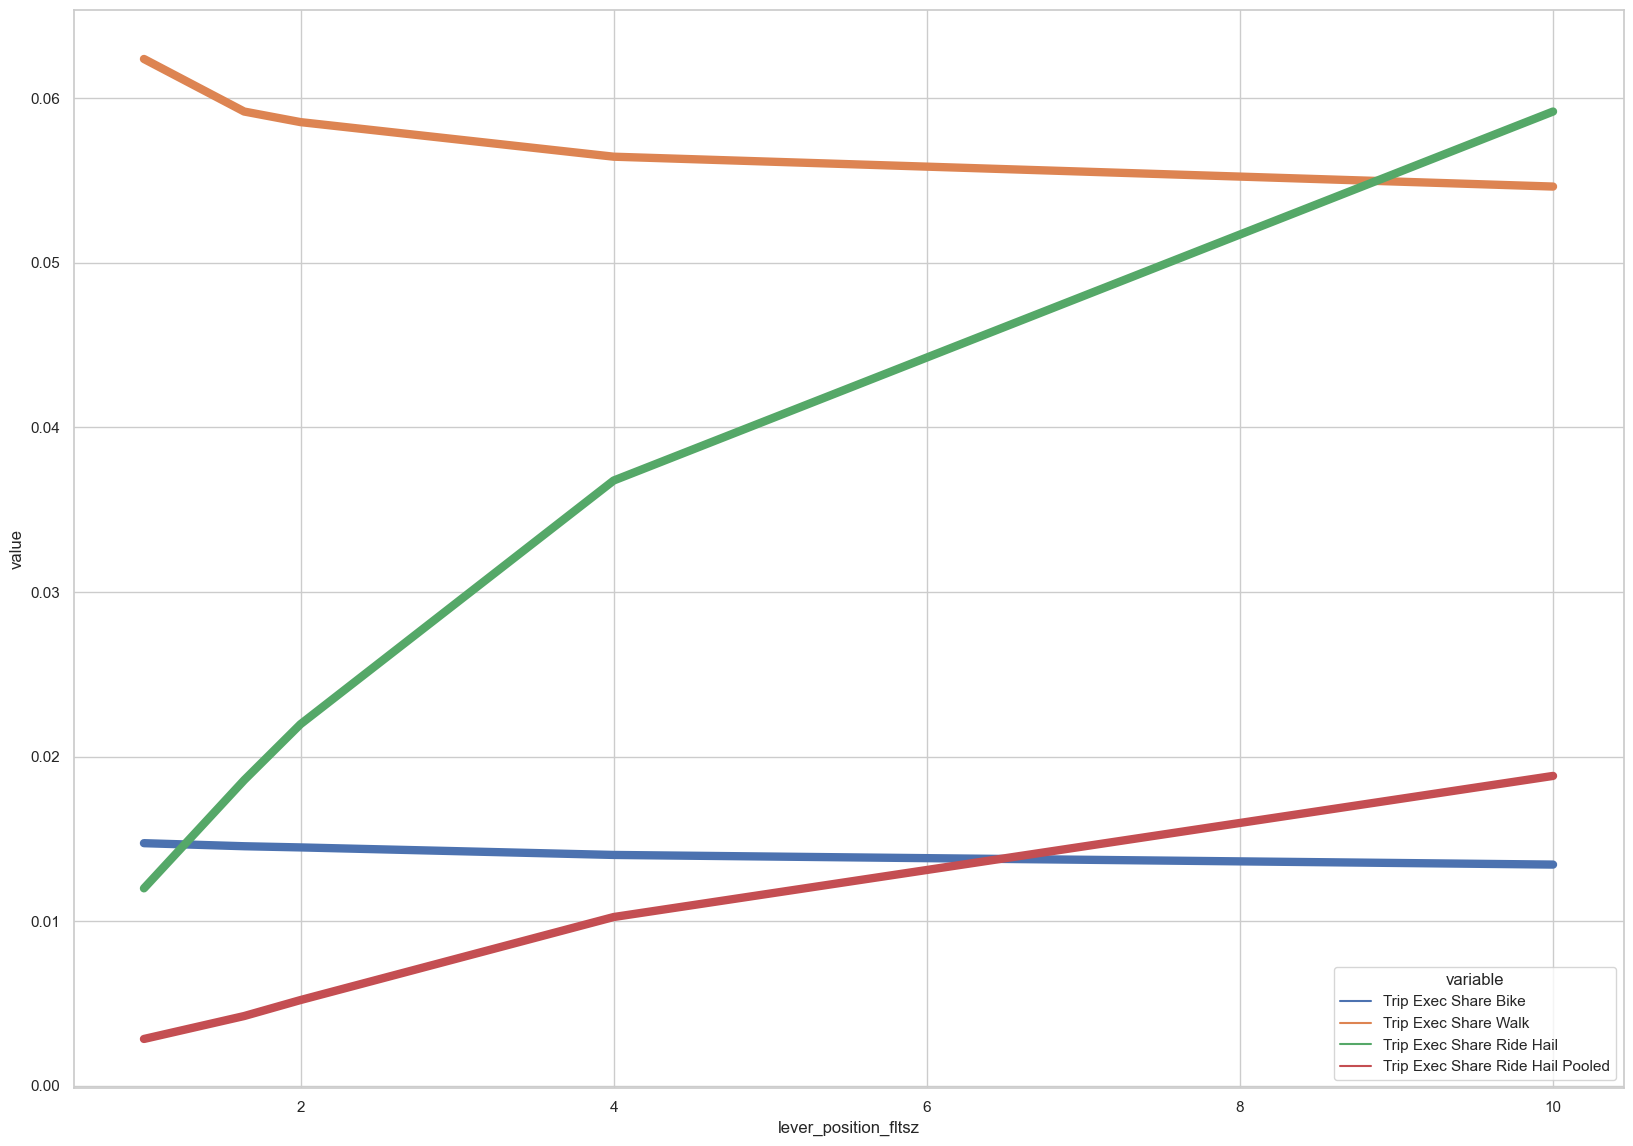

In [73]:
sns.lineplot(data=pd.melt(df_tmLong, ['lever_position_fltsz','lever_n_fleets','lever_position_price']),
             x='lever_position_fltsz', y='value', hue='variable', 
               ci=None, linewidth = 6
             )

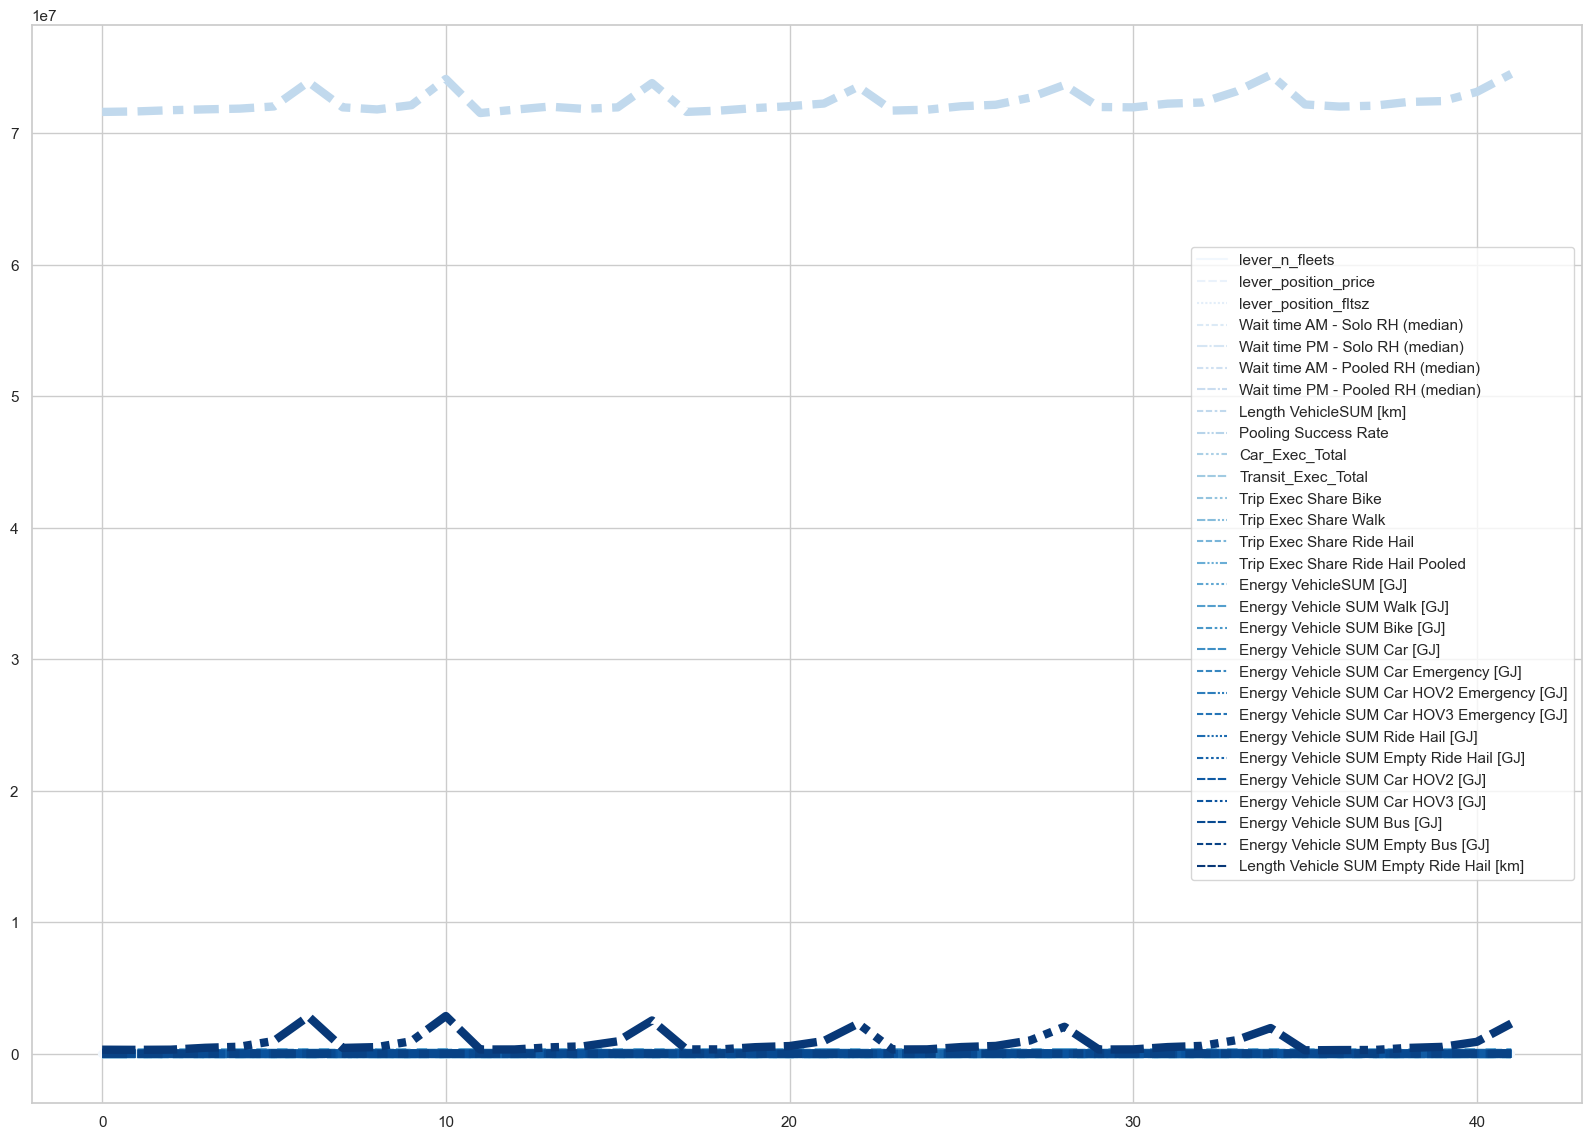

In [51]:
t_plot = sns.lineplot(data = df_temp.loc[ (df_temp['lever_position_price']>=-1)
                                           &(df_temp['lever_position_fltsz']>=-1)
                                           &(df_temp['lever_n_fleets']>=0)], 
           # x = 'lever_position_fltsz', 
            #y = temp_varName, 
            #y=["Wait time PM - Pooled RH (median)", "Trip Exec Share Ride Hail Pooled"],
            #hue = 'lever_n_fleets', # hue, style, size
            #style = 'lever_position_price',
            #size ="lever_position_fltsz", sizes=(5,20),
                      #size_order=["T1", "T2"],
             #palette = palette, 
            ci=None, linewidth = 6,
            palette = 'Blues'
            )
#t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
#t_plot.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 40)
#t_plot.yaxis.set_tick_params(labelsize = 26)
#t_plot.xaxis.set_tick_params(labelsize = 26)
#t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE
#filename  = path_output + temp_varName + "__" + datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
#print(filename)
#plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)